In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# get data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# define enums

In [4]:
passenger_id = 'PassengerId'
survived = 'Survived'
ticket_class = 'Pclass' # 1 = 1st, 2 = 2nd, 3 = 3rd
name = 'Name'
sex = 'Sex'
age = 'Age'
sibling_spouse_count = 'SibSp'
parent_children_count = 'Parch'
ticket_number = 'Ticket'
fare = 'Fare'
cabin_number = 'Cabin'
embarkation_port = 'embarked' # C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
x = [] # no feature is selected yet
y = [survived]

# what features to choose? (feature engineering)
## discovering trends

<AxesSubplot: xlabel='Sex', ylabel='Count'>

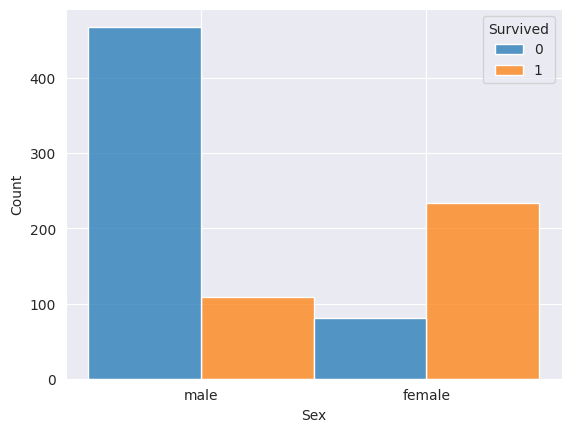

In [19]:
sns.histplot(data=train, x=sex, hue=survived, multiple="dodge")

In [14]:
df = train.groupby([sex, survived]).count().reset_index()[[sex, survived, passenger_id]]
df['percent'] = df[passenger_id] / df.groupby(sex)[passenger_id].transform('sum')
df

,Sex,Survived,PassengerId,percent
0,female,0,81,0.257962
1,female,1,233,0.742038
2,male,0,468,0.811092
3,male,1,109,0.188908


- 74% of females survived
- only 19% of males survived
- __definitely an important feature__

In [28]:
x.append(sex)

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

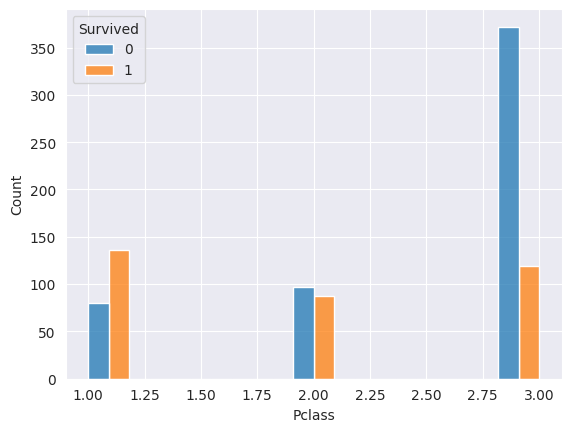

In [20]:
sns.histplot(data=train, x=ticket_class, hue=survived, multiple="dodge")

In [21]:
df = train.groupby([ticket_class, survived]).count().reset_index()[[ticket_class, survived, passenger_id]]
df['percent'] = df[passenger_id] / df.groupby(ticket_class)[passenger_id].transform('sum')
df

,Pclass,Survived,PassengerId,percent
0,1,0,80,0.370370
1,1,1,136,0.629630
2,2,0,97,0.527174
3,2,1,87,0.472826
4,3,0,372,0.757637
5,3,1,119,0.242363


- 93% of first class passengers survived
- 47% of second class passengers survived
- only 24% of third class passengers survived
- __definitely an important feature__

In [29]:
x.append(ticket_class)

In [30]:
x

['Sex', 'Pclass']

<AxesSubplot: xlabel='Age', ylabel='Density'>

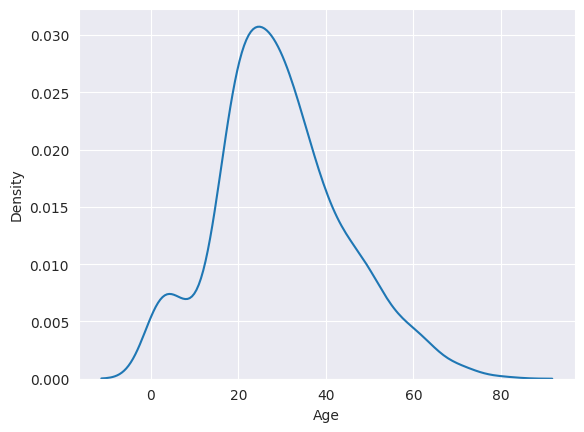

In [35]:
sns.kdeplot(data=train, x=age)